In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, date
import re
from IPython.display import display, HTML
from tabulate import tabulate

In [271]:
file_path='E:/Metro2/raw_data//'
# file_path='E:/Metro2/artifacts//'
df=pd.read_csv(file_path+'Data.csv')
df = df[df['9'] <= 220]
df = df[~(df['10'] == 'Bus')]
df = df[~(df['11'] == 'Bus')]
df = df[~(df['11'] =='Any public transport ')]

In [272]:
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].str.replace(r'\(.*\)', '', regex=True)

In [273]:
display(HTML(f"<h2>Age and Gender</h2>"))

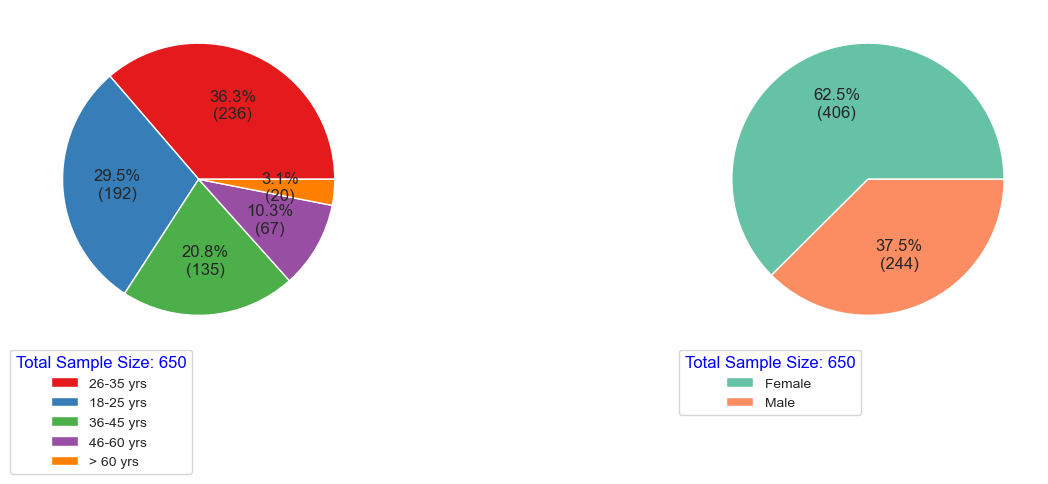

In [274]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['18'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['17'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['18'].value_counts()
age_counts.plot.pie(autopct=lambda pct: func(pct, age_counts), ax=ax[0], shadow=False, colors=colors_age, labels=None)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(age_labels, loc="best", bbox_to_anchor=(0.5, 0.02), fontsize='small', title=f"Total Sample Size: {df_size}")
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['17'].value_counts()
gender_counts.plot.pie(autopct=lambda pct: func(pct, gender_counts), ax=ax[1], shadow=False, colors=colors_gender, labels=None)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02), fontsize='small', title=f"Total Sample Size: {df_size}")
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [275]:
display(HTML(f"<h2>Education and occupation</h2>"))

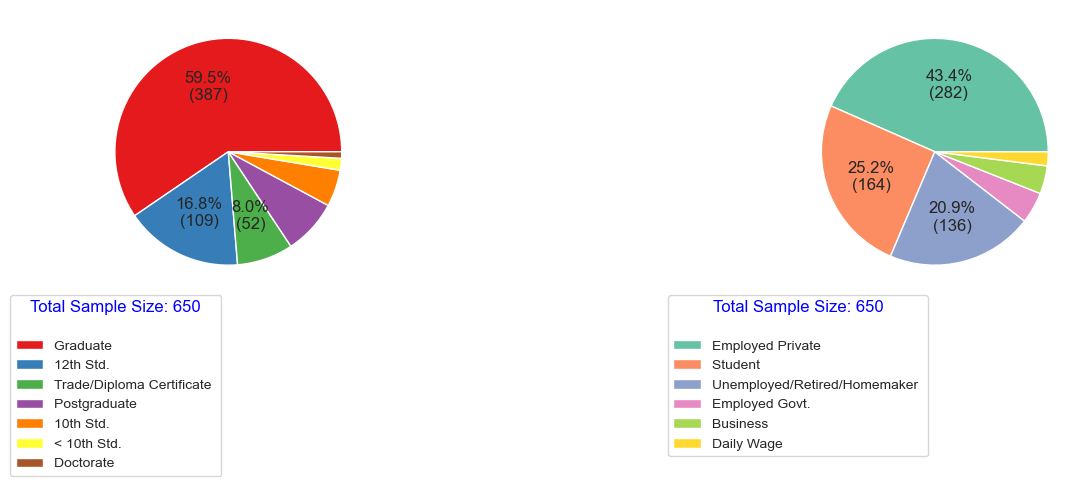

In [276]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['19'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['20'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['19'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['20'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [277]:
display(HTML(f"<h2>Income and Vehicle ownership</h2>"))

In [278]:
def convert_value(val):
    if val == '4+':
        return 4
    else:
        return int(val)

# Apply the conversion function to the columns
df['22b'] = df['22b'].apply(convert_value)
df['22c'] = df['22c'].apply(convert_value)
df['22d'] = df['22d'].apply(convert_value)

# Sum the values of the three columns to create the 'VEH' column
df['VEH'] = df[['22b', '22c', '22d']].sum(axis=1)

# Display the DataFrame


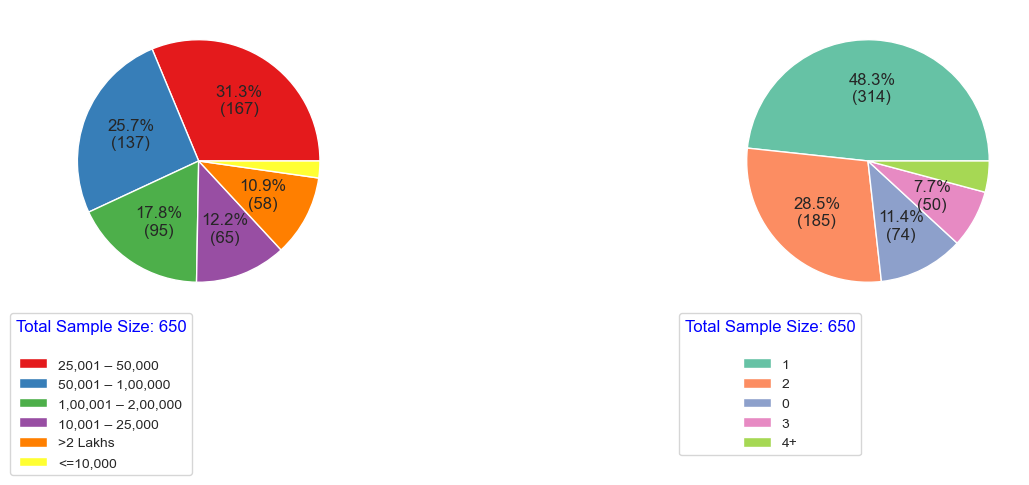

In [279]:
df['VEH'] = df['VEH'].apply(lambda x: '4+' if x >= 4 else str(x))

def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 5 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:5]

def get_top_indices2(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:4]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['21'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df['VEH'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for age distribution
age_counts = df['21'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
# ax[0].set_title('Age Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df['VEH'].value_counts()
top_gender_indices = get_top_indices2(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
# ax[1].set_title('Gender Distribution')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()


In [280]:
df['4'].unique()

array(['Social/Religious place ', 'Work/Business place ', 'Other ',
       'School/College ', 'Friend/Relative’s place ', 'Home ',
       'Restaurant ', 'Shopping place '], dtype=object)

In [281]:
trip_types = {
    'Home based work': [('Home ', 'Work/Business place '), ('Work/Business place ', 'Home ')],
    'Home based education': [('Home ', 'School/College '), ('School/College ', 'Home ')],
    'Home based other': [('Home ', 'Other '), ('Other ', 'Home '),('Home ', 'Restaurant '), ('Restaurant ', 'Home '),
                         ('Home ', 'Shopping place '), ('Shopping place ', 'Home '),('Home ', 'Social/Religious place '), ('Social/Religious place ', 'Home '),
                         ('Home ', 'Friend/Relative’s place '), ('Friend/Relative’s place ', 'Home '),],
}


In [282]:
all_trips = set((row['6'], row['4']) for _, row in df.iterrows())
categorized_trips = set(trip for trips in trip_types.values() for trip in trips)
non_home_based_trips = all_trips - categorized_trips
trip_types['Non home based'] = list(non_home_based_trips)

# Calculate the number of trips and percentages
results = []
trip_totals = {}
trip_percentages = {}

for trip_type, pairs in trip_types.items():
    if trip_type == 'Non home based':
        total_trips = sum(len(df[(df['6'] == origin) & (df['4'] == destination)]) for origin, destination in non_home_based_trips)
        trip_totals[trip_type] = total_trips
        trip_percentage = total_trips / len(df) * 100 if len(df) > 0 else 0
        trip_percentages[trip_type] = round(trip_percentage,2)
        results.append([trip_type, 'Non home', 'Non home', total_trips])
    else:
        total_trips = sum(len(df[(df['6'] == origin) & (df['4'] == destination)]) for origin, destination in pairs)
        trip_totals[trip_type] = total_trips
        trip_percentage = total_trips / len(df) * 100 if len(df) > 0 else 0
        trip_percentages[trip_type] = trip_percentage
        for origin, destination in pairs:
            trip_count = len(df[(df['6'] == origin) & (df['4'] == destination)])
            results.append([trip_type, origin, destination, trip_count])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Type of trip', 'Origin', 'Destination', 'No of trips'])

# Calculate %OD based
total_trips = len(df)
results_df['%OD based'] = round(results_df['No of trips'] / total_trips * 100,2)

# Adding Sl No
results_df.insert(0, 'Sl No', range(1, len(results_df) + 1))

# Grouping by 'Type of trip'
grouped_df = results_df.groupby('Type of trip')

# Function to create a table with solid lines and centered text
def print_solid_table(df, trip_totals, trip_percentages):
    header = ["Sl No", "Type of trip", "Origin", "Destination", "No of trips", "%(type of trips)", "%OD based"]
    max_len = {col: max(df[col].astype(str).map(len).max(), len(col)) if col in df else len(col) for col in header}
    
    def draw_line():
        line = "+"
        for col in header:
            line += "-" * (max_len[col] + 2) + "+"
        print(line)

    def draw_row(row, show_type, show_sl_no, show_percentage):
        line = "|"
        for col in header:
            if col == "Type of trip" and not show_type:
                line += " " * (max_len[col] + 2) + "|"
            elif col == "Sl No" and not show_sl_no:
                line += " " * (max_len[col] + 2) + "|"
            elif col == "%(type of trips)" and not show_percentage:
                line += " " * (max_len[col] + 2) + "|"
            else:
                line += " " + str(row[col]).center(max_len[col]) + " |"
        print(line)

    def draw_merged_row(index, label, count, percentage):
        sl_no = str(index)
        line = "| " + sl_no.center(max_len["Sl No"]) + " | " + label.center(max_len["Type of trip"]) + " |"
        line += " " * (max_len["Origin"] + 2) + "|"
        line += " " * (max_len["Destination"] + 2) + "|"
        line += str(count).center(max_len["No of trips"] + 2) + "|"
        line += str(round(percentage, 2)).center(max_len["%(type of trips)"] + 2) + "|"
        line += " " * (max_len["%OD based"] + 2) + "|"
        print(line)

    draw_line()
    draw_row({col: col for col in header}, True, True, True)
    draw_line()
    
    sl_no = 1
    for trip_type, group in grouped_df:
        draw_merged_row(sl_no, trip_type, trip_totals[trip_type], trip_percentages[trip_type])
        type_trip_count = len(group)
        for i, (_, row) in enumerate(group.iterrows()):
            show_type = i < 0
            show_sl_no = i == -1
            draw_row(row, show_type, show_sl_no, False)
            type_trip_count -= 1
        draw_line()
        sl_no += 1

# Print the final table
print_solid_table(results_df, trip_totals, trip_percentages)

# Print the total number of samples
print(f"\nTotal number of samples: {total_trips}")

+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
| Sl No |     Type of trip     |          Origin          |       Destination        | No of trips | %(type of trips) | %OD based |
+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
|   1   | Home based education |                          |                          |      98     |      15.08       |           |
|       |                      |          Home            |     School/College       |      41     |                  |    6.31   |
|       |                      |     School/College       |          Home            |      57     |                  |    8.77   |
+-------+----------------------+--------------------------+--------------------------+-------------+------------------+-----------+
|   2   |   Home based other   |                          |                 

In [283]:
df['8'].unique()
trip_map={'Bus + Metro ':'Bus + Metro', 'Metro ':'Metro', 'Bus + metro + metro':'Bus + Metro', 'Metro + Bus ':'Metro + Bus',
       'Bus1 + Metro + Bus2 ':'Bus1 + Metro + Bus2', 'Bus + metro1 + metro2':'Bus + Metro', 'Railway+metro ':'Metro',
       'Metro + Metro':'Metro', 'Train + metro + bus':'Metro + Bus', 'Bus ':'Metro'}
df['8']=df['8'].map(trip_map)

In [284]:
display(HTML(f"<h2>Sequence of modes</h2>"))

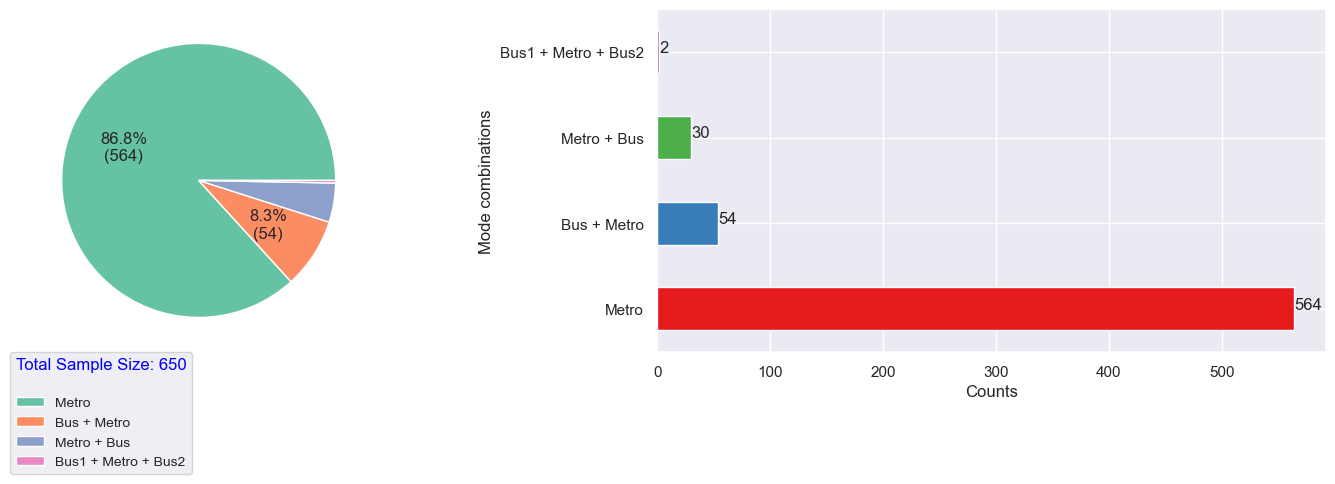

In [285]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top sectors
def get_top_indices(counts, n=2):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:n]

# Set Seaborn style
sns.set(style="darkgrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Define color schemes
colors_gender = sns.color_palette("Set2", len(df['8'].value_counts()))
colors_age = sns.color_palette("Set1", len(df['8'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]

# Pie chart for gender distribution
gender_counts = df['8'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[0], shadow=False, colors=colors_gender, labels=None
)
# ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[0].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

# Horizontal bar chart for age distribution
age_counts = df['8'].value_counts()
age_counts.plot.barh(ax=ax[1], color=colors_age)
ax[1].set_xlabel('Counts')
ax[1].set_ylabel('Mode combinations')
# ax[1].set_title('Age Distribution')
for index, value in enumerate(age_counts):
    ax[1].text(value, index, str(value))

plt.tight_layout()
plt.show()

In [286]:
display(HTML(f"<h2>Door to door travel time</h2>"))

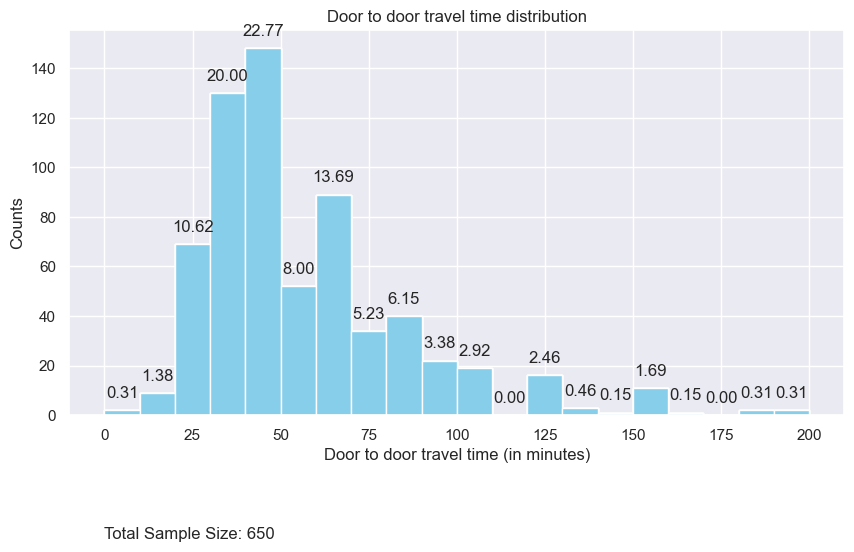

In [287]:
df['9'].describe()

plt.figure(figsize=(10, 5))

# Plot histogram with specified color
plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')

# Add labels and title
plt.xlabel('Door to door travel time (in minutes)')
plt.ylabel('Counts')
plt.title('Door to door travel time distribution')

# Add percentage on top of each bar
total_count = len(df['9'])
for i in range(len(plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')[0])):
    count = plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')[0][i]
    percentage = count / total_count * 100
    plt.text(plt.hist(df['9'], bins=range(0, int(df['9'].max()) + 10, 10), color='skyblue')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size and size of dataframe below the plot
plt.text(0, -50, f'Total Sample Size: {total_count}', fontsize=12)
# plt.text(0, -70, f'Size of DataFrame: {len(df)}', fontsize=12)

plt.show()

In [288]:
df['10'].unique()
access_map={'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ', 'Walk ':'Walk ',
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Drove and parked a car ':'Drove and parked a car ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Ola/Uber car ':'Ola/Uber car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others',
       'Rapido/uber moto/Ola App two-wheeler ':'Rapido/Uber moto/Ola App two-wheeler '}
df['10']=df['10'].map(access_map)

In [289]:
display(HTML(f"<h2>Access modes</h2>"))

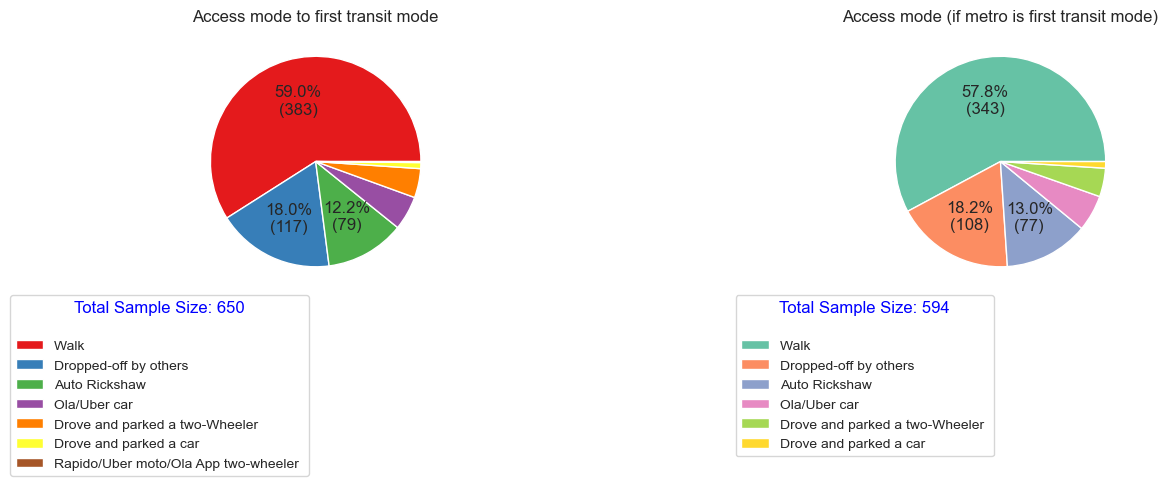

In [290]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Metro + Bus')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['10'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['10'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['10'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Access mode to first transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['10'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Access mode (if metro is first transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [291]:
display(HTML(f"<h2>Access travel time</h2>"))

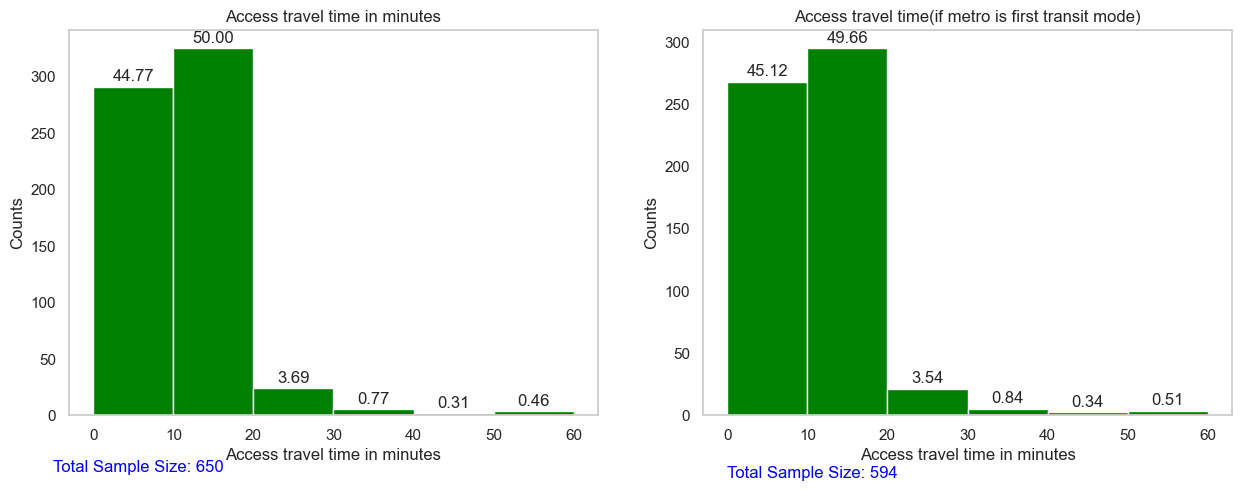

In [292]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for the left subplot
# Assuming df['10'] contains the data for the left histogram
axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')

# Add labels and title for the left subplot
axs[0].set_xlabel('Access travel time in minutes')
axs[0].set_ylabel('Counts')
axs[0].set_title('Access travel time in minutes')

# Add percentage on top of each bar for the left subplot
total_count_left = len(df['10a'])
for i in range(len(axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')[0])):
    count = axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_left * 100
    axs[0].text(axs[0].hist(df['10a'], bins=range(0, int(df['10a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the left plot
axs[0].text(-5, -50, f'Total Sample Size: {total_count_left}', fontsize=12,color='blue')

# Plot histogram for the right subplot
df_metro = df.loc[(df['8'] == 'Metro') | (df['8'] == 'Metro + Bus')]
# Assuming df_metro['10a'] contains the data for the right histogram where column 8 is 'Metro'
axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')

# Add labels and title for the right subplot
axs[1].set_xlabel('Access travel time in minutes')
axs[1].set_ylabel('Counts')
axs[1].set_title('Access travel time(if metro is first transit mode)')

# Add percentage on top of each bar for the right subplot
total_count_right = len(df_metro['10a'])
for i in range(len(axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')[0])):
    count = axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_right * 100
    axs[1].text(axs[1].hist(df_metro['10a'], bins=range(0, int(df_metro['10a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the right plot
axs[1].text(0, -50, f'Total Sample Size: {total_count_right}', fontsize=12,color='blue')

axs[0].grid(False)
axs[1].grid(False)

plt.show()

In [293]:
display(HTML(f"<h2>Access distance</h2>"))

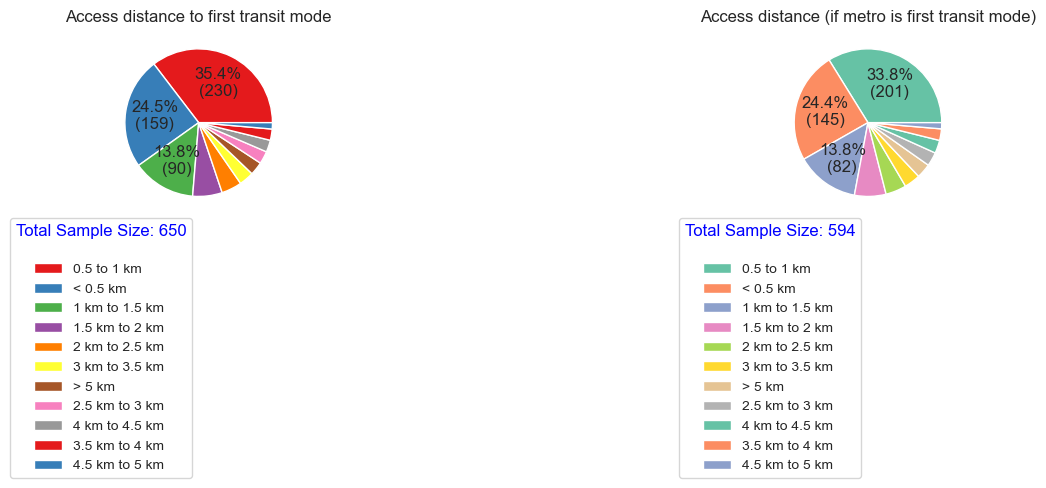

In [294]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Metro + Bus')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['10b'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['10b'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['10b'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Access distance to first transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['10b'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Access distance (if metro is first transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [298]:
df['11'].unique()
egress_map={'Walk ':'Walk ', 'Auto Rickshaw ':'Auto Rickshaw ', 'Drove and parked a two-Wheeler ':'Drove and parked a two-Wheeler ',
       'Ola/Uber car ':'Ola/Uber car ', 'Drove and parked a car ':'Drove and parked a car ',
       'Dropped-off by friends/family members/others using car ':'Dropped-off by others', 
       'Dropped-off by friends/family members/others using two-wheeler ':'Dropped-off by others',
       'Walk':'Walk ', 
       'Rapido/Uber moto/Ola App two-wheeler ':'Rapido/Uber moto/Ola App two-wheeler '}

df['11']=df['11'].map(egress_map)

In [299]:
display(HTML(f"<h2>Egress modes</h2>"))

In [308]:
df['8'].unique()

array(['Bus + Metro', 'Metro', 'Metro + Bus', 'Bus1 + Metro + Bus2'],
      dtype=object)

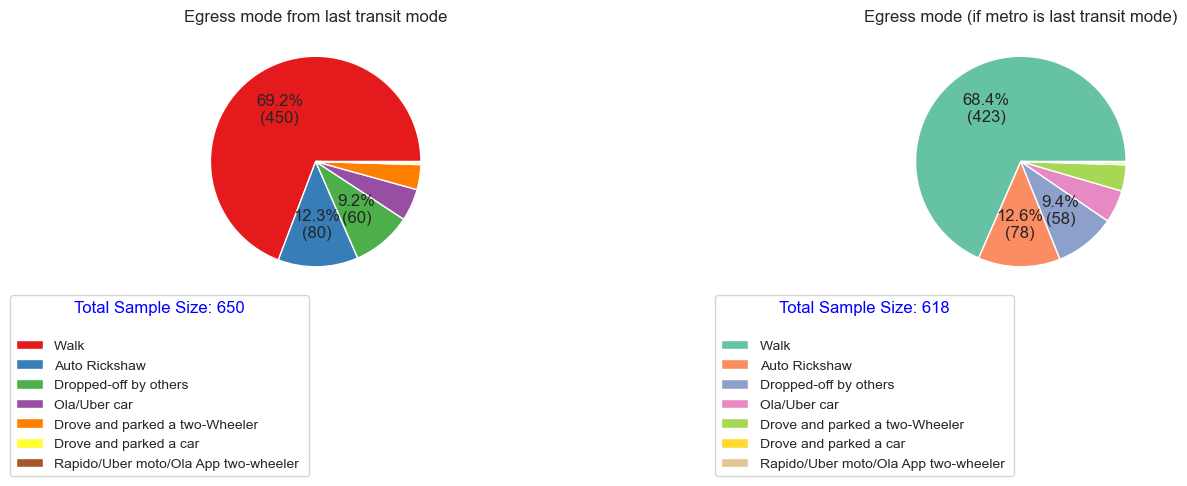

In [309]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Bus + Metro')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['11'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['11'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['11'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Egress mode from last transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['11'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Egress mode (if metro is last transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()

In [302]:
display(HTML(f"<h2>Egress travel time</h2>"))

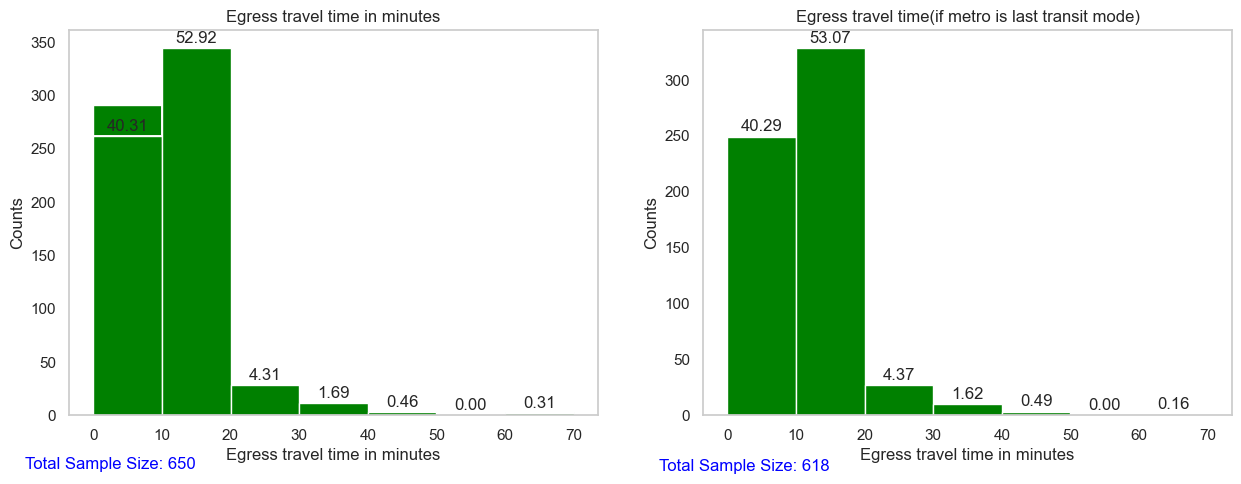

In [314]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for the left subplot
# Assuming df['10'] contains the data for the left histogram
axs[0].hist(df['10a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')

# Add labels and title for the left subplot
axs[0].set_xlabel('Egress travel time in minutes')
axs[0].set_ylabel('Counts')
axs[0].set_title('Egress travel time in minutes')

# Add percentage on top of each bar for the left subplot
total_count_left = len(df['11a'])
for i in range(len(axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')[0])):
    count = axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_left * 100
    axs[0].text(axs[0].hist(df['11a'], bins=range(0, int(df['11a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the left plot
axs[0].text(-10, -50, f'Total Sample Size: {total_count_left}', fontsize=12,color='blue')

# Plot histogram for the right subplot
df_metro=df.loc[(df['8']=='Metro') | (df['8']=='Bus + Metro')]
# Assuming df_metro['10a'] contains the data for the right histogram where column 8 is 'Metro'
axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')

# Add labels and title for the right subplot
axs[1].set_xlabel('Egress travel time in minutes')
axs[1].set_ylabel('Counts')
axs[1].set_title('Egress travel time(if metro is last transit mode)')

# Add percentage on top of each bar for the right subplot
total_count_right = len(df_metro['11a'])
for i in range(len(axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')[0])):
    count = axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')[0][i]
    percentage = count / total_count_right * 100
    axs[1].text(axs[1].hist(df_metro['11a'], bins=range(0, int(df_metro['11a'].max()) + 10, 10), color='green')[1][i] + 5, count + 5, f'{percentage:.2f}', ha='center')

# Add total sample size below the right plot
axs[1].text(-10, -50, f'Total Sample Size: {total_count_right}', fontsize=12,color='blue')

axs[0].grid(False)
axs[1].grid(False)

plt.show()

In [304]:
display(HTML(f"<h2>Egress distance</h2>"))

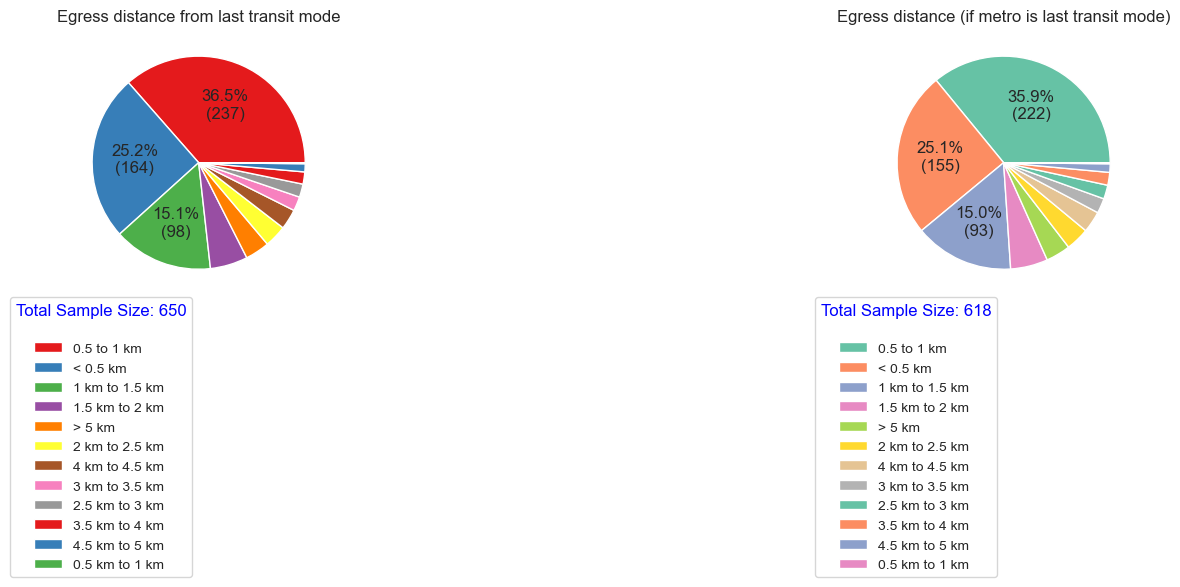

In [316]:
def func(pct, allvals, top_indices):
    absolute = int(round(pct / 100. * np.sum(allvals)))
    index = np.argmax(np.array(allvals) == absolute)
    if index in top_indices:
        return "{:.1f}%\n({:d})".format(pct, absolute)
    else:
        return ""

# Helper function to get indices of top 3 sectors
def get_top_indices(counts):
    sorted_indices = counts.argsort()[::-1]
    return sorted_indices[:3]

# Set Seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

df2=df.loc[(df['8']=='Metro') | (df['8']=='Bus + Metro')]

# Define color schemes
colors_age = sns.color_palette("Set1", len(df['11b'].value_counts()))
colors_gender = sns.color_palette("Set2", len(df2['11b'].value_counts()))

# Get the size of the DataFrame
df_size = df.shape[0]
df_size2=df2.shape[0]

# Pie chart for age distribution
age_counts = df['11b'].value_counts()
top_age_indices = get_top_indices(age_counts.values)
age_counts.plot.pie(
    autopct=lambda pct: func(pct, age_counts.values, top_age_indices),
    ax=ax[0], shadow=False, colors=colors_age, labels=None
)
ax[0].set_title('Egress distance from last transit mode')
ax[0].set_ylabel('')  # Remove y-label

# Add legend for age distribution with DataFrame size
age_labels = age_counts.index
legend_age = ax[0].legend(
    age_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size}\n"
)
plt.setp(legend_age.get_title(), fontsize='medium', color='blue')

# Pie chart for gender distribution
gender_counts = df2['11b'].value_counts()
top_gender_indices = get_top_indices(gender_counts.values)
gender_counts.plot.pie(
    autopct=lambda pct: func(pct, gender_counts.values, top_gender_indices),
    ax=ax[1], shadow=False, colors=colors_gender, labels=None
)
ax[1].set_title('Egress distance (if metro is last transit mode)')
ax[1].set_ylabel('')  # Remove y-label

# Add legend for gender distribution with DataFrame size
gender_labels = gender_counts.index
legend_gender = ax[1].legend(
    gender_labels, loc="best", bbox_to_anchor=(0.5, 0.02),
    fontsize='small', title=f"Total Sample Size: {df_size2}\n"
)
plt.setp(legend_gender.get_title(), fontsize='medium', color='blue')

plt.tight_layout()
plt.show()